In [1]:
import sys

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import csv

import seaborn as sbn
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Deep learning Keras imports
from keras.models import Sequential
from keras.layers import Dropout,BatchNormalization,Dense
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
df = pd.read_csv('weather_train.csv')

In [3]:
df.head(5)

Unnamed: 0        Date       Location  MinTemp  MaxTemp  Rainfall  \
0      110363  2014-01-25         Albany     18.4     26.8       0.2   
1       22316  2012-05-12  NorfolkIsland     16.1     22.1       2.4   
2       75456  2010-04-22       Portland     11.6     26.4       0.2   
3       81222  2009-08-13       Dartmoor      6.8     16.5       0.8   
4        1753  2013-12-17         Albury     16.9     34.0       0.0   

   Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Humidity9am  \
0          4.8       8.5         NaN            NaN  ...        59.0   
1          4.2       8.7           S           31.0  ...        70.0   
2          2.2      10.4           W           37.0  ...        72.0   
3          1.4       6.7          NW           37.0  ...        99.0   
4          NaN       NaN           N           30.0  ...        54.0   

  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0        72.0       1014.9       1009.2       0.0       3.0     24.0     23.8   
1        70.0       1020.2       1018.2       2.0       3.0     19.9     20.3   
2        59.0       1018.4       1015.5       2.0       6.0     19.7     24.0   
3        74.0       1015.0       1014.8       NaN       NaN      8.6     14.8   
4        29.0       1019.5       1016.3       NaN       4.0     24.7     31.8   

   RainToday  RainTomorrow  
0         No            No  
1        Yes            No  
2         No           Yes  
3         No            No  
4         No            No  

[5 rows x 24 columns]

In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  129566.000000  129775.000000  127976.000000  74466.000000   
mean       12.199208      23.224438       2.366630      5.463015   
std         6.399494       7.116258       8.512714      4.203093   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  68084.000000  121682.000000  129322.000000  128187.000000   
mean       7.608278      40.015713      14.042321      18.655659   
std        3.787968      13.584944       8.911504       8.810714   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  128518.000000  126888.000000  117351.000000  117391.000000   
mean       68.895758      51.554749    1017.658746    1015.263714   
std        19.021761      20.789778       7.108846       7.039604   
min         1.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.000000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  80673.000000  77565.000000  129315.000000  127688.000000  
mean       4.447622      4.510320      16.995984      21.686721  
std        2.887787      2.720274       6.489760       6.934487  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

In [6]:
df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2014-01-25         Albany     18.4     26.8       0.2          4.8   
1       2012-05-12  NorfolkIsland     16.1     22.1       2.4          4.2   
2       2010-04-22       Portland     11.6     26.4       0.2          2.2   
3       2009-08-13       Dartmoor      6.8     16.5       0.8          1.4   
4       2013-12-17         Albury     16.9     34.0       0.0          NaN   
...            ...            ...      ...      ...       ...          ...   
130909  2009-07-01  NorfolkIsland     12.3     18.8       3.2          2.2   
130910  2016-04-02       Richmond     12.8     32.0       0.0          NaN   
130911  2010-06-21       Watsonia      5.1     13.8       2.6          2.0   
130912  2012-06-24      NorahHead      5.8     17.1       0.0          NaN   
130913  2009-10-29       Ballarat      9.5     26.7       1.4          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            8.5         NaN            NaN         NE  ...        59.0   
1            8.7           S           31.0        SSW  ...        70.0   
2           10.4           W           37.0        NNW  ...        72.0   
3            6.7          NW           37.0          N  ...        99.0   
4            NaN           N           30.0          E  ...        54.0   
...          ...         ...            ...        ...  ...         ...   
130909       7.3         SSW           19.0        NaN  ...        69.0   
130910       NaN           W           31.0        NaN  ...        81.0   
130911       7.5         ENE           13.0         NE  ...       100.0   
130912       NaN         WNW           22.0         NW  ...        59.0   
130913       NaN         NNE           35.0        NNE  ...        64.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              72.0       1014.9       1009.2       0.0       3.0     24.0   
1              70.0       1020.2       1018.2       2.0       3.0     19.9   
2              59.0       1018.4       1015.5       2.0       6.0     19.7   
3              74.0       1015.0       1014.8       NaN       NaN      8.6   
4              29.0       1019.5       1016.3       NaN       4.0     24.7   
...             ...          ...          ...       ...       ...      ...   
130909         65.0       1017.7       1016.0       2.0       3.0     17.4   
130910         18.0       1016.8       1014.0       NaN       NaN     17.6   
130911         60.0       1035.1       1034.2       2.0       4.0      6.7   
130912         49.0       1028.6       1026.7       NaN       NaN     10.1   
130913         46.0       1022.6       1019.8       6.0       NaN     16.8   

        Temp3pm  RainToday  RainTomorrow  
0          23.8         No            No  
1          20.3        Yes            No  
2          24.0         No           Yes  
3          14.8         No            No  
4          31.8         No            No  
...         ...        ...           ...  
130909     18.2        Yes            No  
130910     30.8         No            No  
130911     13.4        Yes            No  
130912     15.9         No            No  
130913     26.1        Yes            No  

[130914 rows x 23 columns]

In [7]:
# Let's see % of missing values
df.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010297
MaxTemp          0.008700
Rainfall         0.022442
Evaporation      0.431184
Sunshine         0.479933
WindGustDir      0.070955
WindGustSpeed    0.070520
WindDir9am       0.072406
WindDir3pm       0.028820
WindSpeed9am     0.012161
WindSpeed3pm     0.020830
Humidity9am      0.018302
Humidity3pm      0.030753
Pressure9am      0.103602
Pressure3pm      0.103297
Cloud9am         0.383771
Cloud3pm         0.407512
Temp9am          0.012214
Temp3pm          0.024642
RainToday        0.022442
RainTomorrow     0.022450
dtype: float64

# Data Visualization

## 1) Correlation among the numeric attributes

<AxesSubplot:>

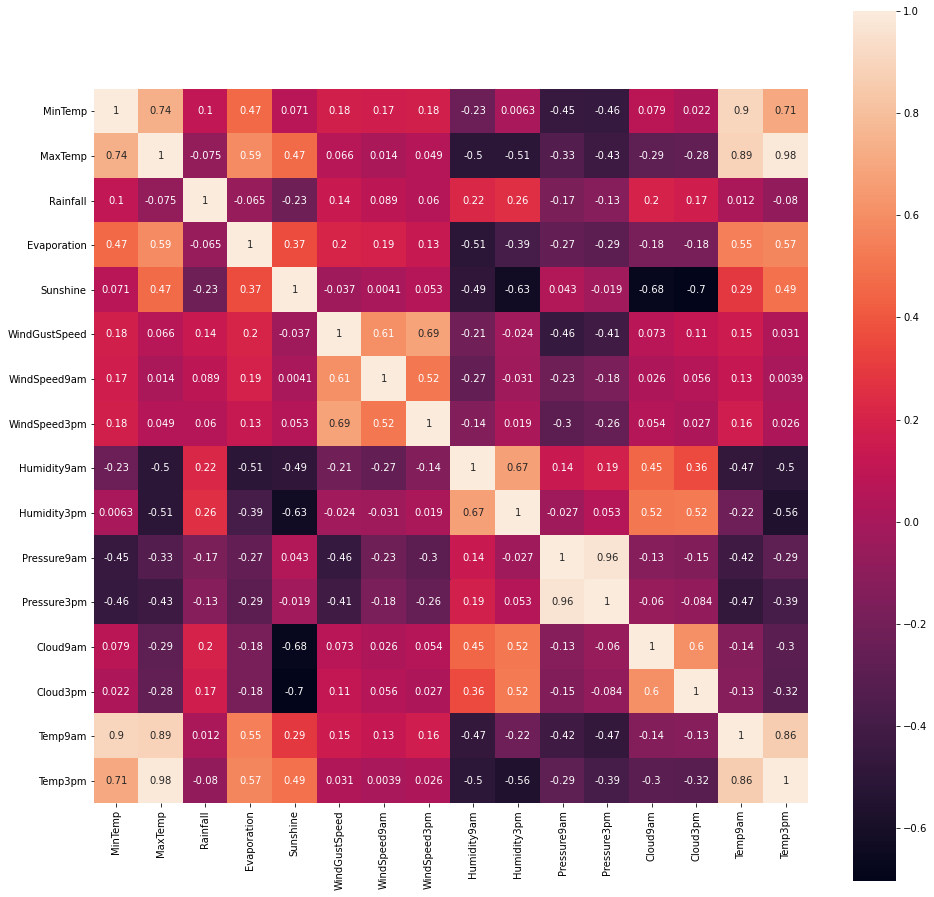

In [8]:
# Correlation amongst numeric attributes
corrmat = df.corr()
plt.subplots(figsize=(16,16))
sbn.heatmap(corrmat,annot=True, square=True)

## 2) Visualize "Rain Today" Column

<AxesSubplot:xlabel='RainToday', ylabel='count'>

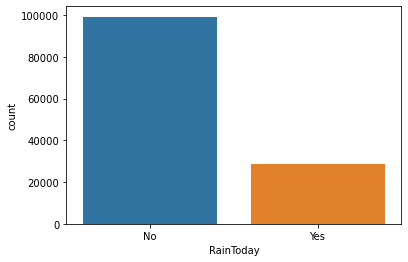

In [9]:
# Rain Today values
sbn.countplot(data = df,x = "RainToday")

## 3) Visualize "Rain Tomorrow" Column

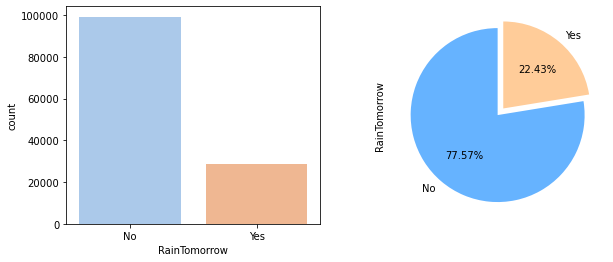

In [10]:
# The Class Distribution
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(10,4))
labels=['No', 'Yes']
sbn.countplot(x=df.RainTomorrow, data=df, palette="pastel",ax=ax[0])

#Pie Chart
df['RainTomorrow'].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66b3ff','#ffcc99'], 
                                             labels=labels, explode = (0, 0.1), startangle=90)
plt.show()

## 4) Visualize "Rainfall" across locations

In [11]:
# mean rainfall all data 
df["Rainfall"].mean()

2.366630461961941

In [12]:
# Top 10 most rainfall on location 
df[["Location","Rainfall"]].groupby("Location").mean().sort_values(by="Rainfall",ascending=False).iloc[:10]

Rainfall
Location              
Cairns        5.899515
Darwin        5.185933
CoffsHarbour  5.135506
GoldCoast     3.707033
Wollongong    3.569478
Williamtown   3.507008
NorahHead     3.447050
Sydney        3.416362
Townsville    3.348368
MountGinini   3.248626

In [13]:
fig = px.bar(df[["Location","Rainfall"]].groupby("Location").mean().sort_values(by="Rainfall",ascending=False).iloc[:10],x="Rainfall",labels={"Location":"Location Names","Rainfall":"Rainfall Amount in day(mm)"})
fig.update_layout(
title={
    "x":0.5,
    "y":0.95,
    "xanchor":"center",
    "yanchor":"top",
    "text": "Top 10 Location with maximium rainfall"
})
fig.show()

## 5) Rainfall with respect to "Max Temperature" and "Min Temperature"

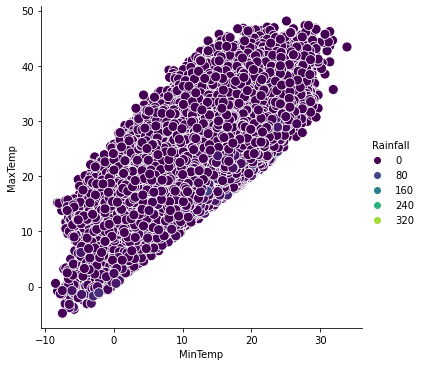

In [14]:
_ = sbn.relplot(x="MinTemp",y="MaxTemp",hue="Rainfall",palette="viridis",data=df,s=100)

## 6) "Rain Tomorrow" in relation to "Humidity" at different times

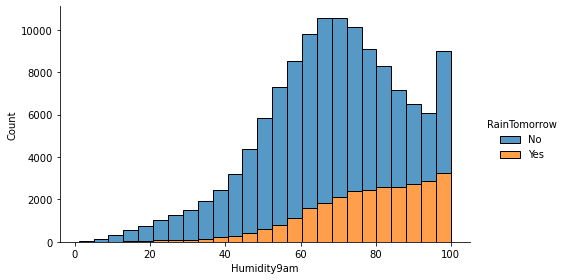

In [15]:
sbn.displot(data = df, kind = 'hist', x = 'Humidity9am', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

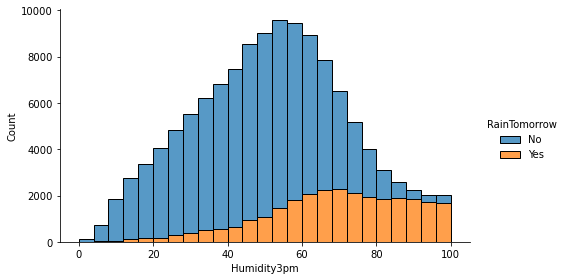

In [16]:
sbn.displot(data = df, kind = 'hist', x = 'Humidity3pm', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

## 7) "Rain Tomorrow" in relation to "Cloudy" at different times

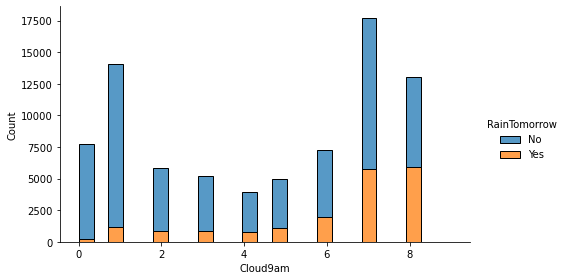

In [17]:
sbn.displot(data = df, kind = 'hist', x = 'Cloud9am', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

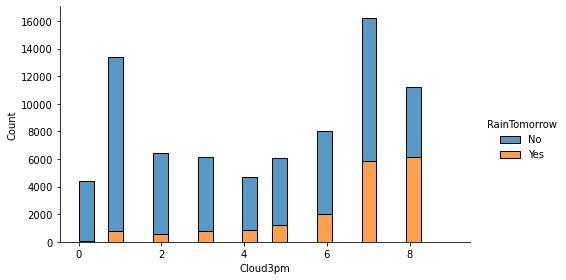

In [18]:
sbn.displot(data = df, kind = 'hist', x = 'Cloud3pm', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

## split date column to day month and year

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
#df.drop('Date', axis=1 ,inplace=True)
df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2014-01-25         Albany     18.4     26.8       0.2          4.8   
1      2012-05-12  NorfolkIsland     16.1     22.1       2.4          4.2   
2      2010-04-22       Portland     11.6     26.4       0.2          2.2   
3      2009-08-13       Dartmoor      6.8     16.5       0.8          1.4   
4      2013-12-17         Albury     16.9     34.0       0.0          NaN   
...           ...            ...      ...      ...       ...          ...   
130909 2009-07-01  NorfolkIsland     12.3     18.8       3.2          2.2   
130910 2016-04-02       Richmond     12.8     32.0       0.0          NaN   
130911 2010-06-21       Watsonia      5.1     13.8       2.6          2.0   
130912 2012-06-24      NorahHead      5.8     17.1       0.0          NaN   
130913 2009-10-29       Ballarat      9.5     26.7       1.4          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  \
0            8.5         NaN            NaN         NE  ...      1009.2   
1            8.7           S           31.0        SSW  ...      1018.2   
2           10.4           W           37.0        NNW  ...      1015.5   
3            6.7          NW           37.0          N  ...      1014.8   
4            NaN           N           30.0          E  ...      1016.3   
...          ...         ...            ...        ...  ...         ...   
130909       7.3         SSW           19.0        NaN  ...      1016.0   
130910       NaN           W           31.0        NaN  ...      1014.0   
130911       7.5         ENE           13.0         NE  ...      1034.2   
130912       NaN         WNW           22.0         NW  ...      1026.7   
130913       NaN         NNE           35.0        NNE  ...      1019.8   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0            0.0       3.0     24.0     23.8         No            No  2014   
1            2.0       3.0     19.9     20.3        Yes            No  2012   
2            2.0       6.0     19.7     24.0         No           Yes  2010   
3            NaN       NaN      8.6     14.8         No            No  2009   
4            NaN       4.0     24.7     31.8         No            No  2013   
...          ...       ...      ...      ...        ...           ...   ...   
130909       2.0       3.0     17.4     18.2        Yes            No  2009   
130910       NaN       NaN     17.6     30.8         No            No  2016   
130911       2.0       4.0      6.7     13.4        Yes            No  2010   
130912       NaN       NaN     10.1     15.9         No            No  2012   
130913       6.0       NaN     16.8     26.1        Yes            No  2009   

        Month  Day  
0           1   25  
1           5   12  
2           4   22  
3           8   13  
4          12   17  
...       ...  ...  
130909      7    1  
130910      4    2  
130911      6   21  
130912      6   24  
130913     10   29  

[130914 rows x 26 columns]

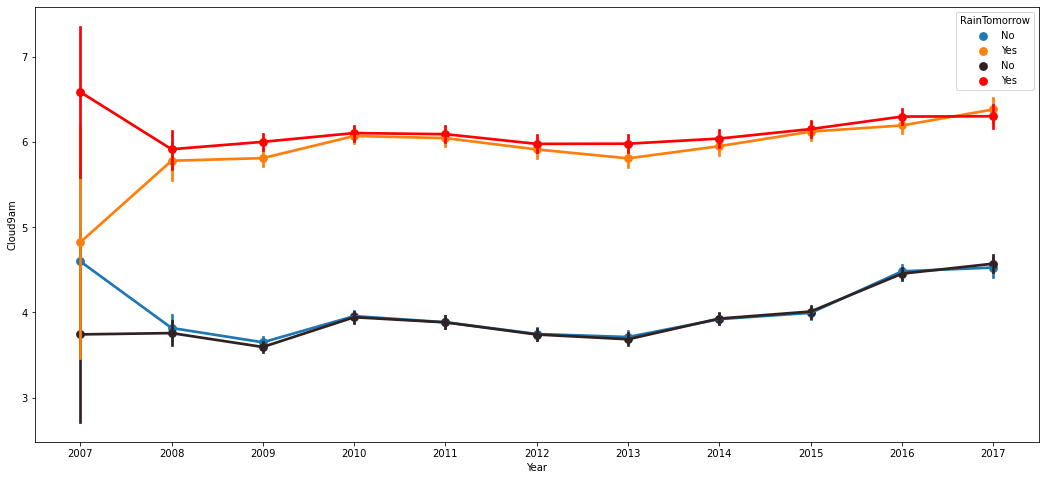

In [20]:
from plotly.offline import iplot
fig, ax =plt.subplots(nrows=1,ncols=1, figsize=(18,8))
sbn.pointplot(x="Year",y="Cloud9am",data=df,hue="RainToday")
sbn.pointplot(x="Year",y="Cloud9am",data=df,hue="RainTomorrow",color="red")
plt.show()

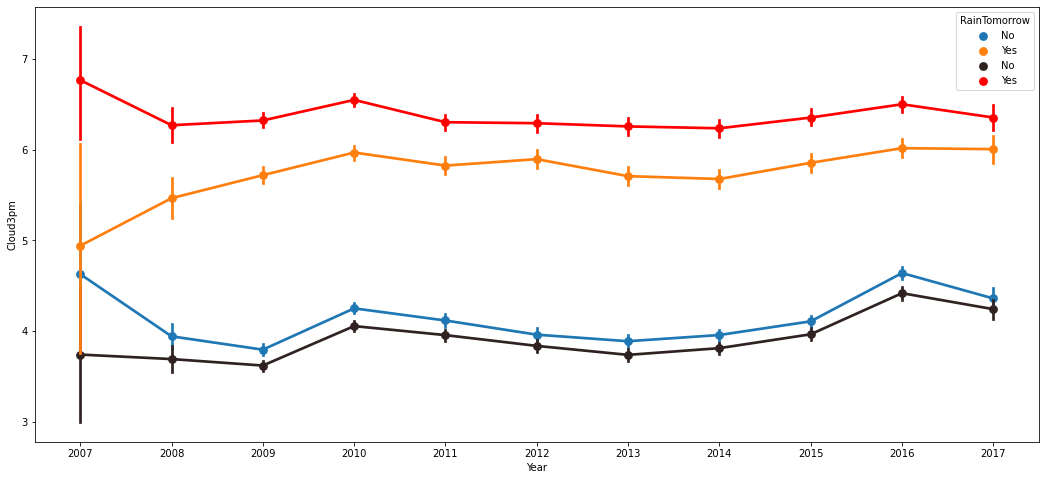

In [21]:
from plotly.offline import iplot
fig, ax =plt.subplots(nrows=1,ncols=1, figsize=(18,8))
sbn.pointplot(x="Year",y="Cloud3pm",data=df,hue="RainToday")
sbn.pointplot(x="Year",y="Cloud3pm",data=df,hue="RainTomorrow",color="red")
plt.show()

## 8) visualize "Rain" across "Years"

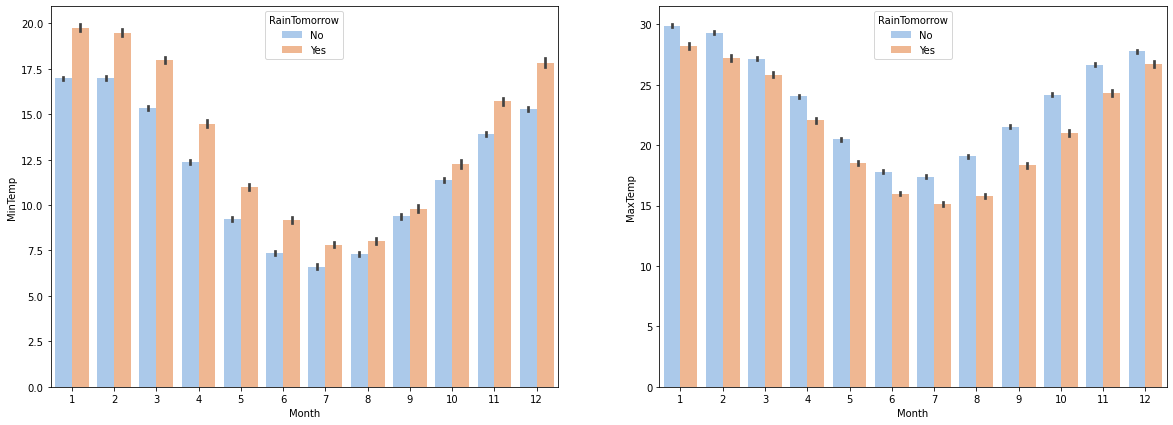

In [22]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(20,7))
sbn.barplot(x=df.Month,y=df.MinTemp,hue="RainTomorrow",data=df,ax=ax[0],palette="pastel")
sbn.barplot(x=df.Month,y=df.MaxTemp,hue="RainTomorrow",data=df,ax=ax[1],palette="pastel")
plt.show()

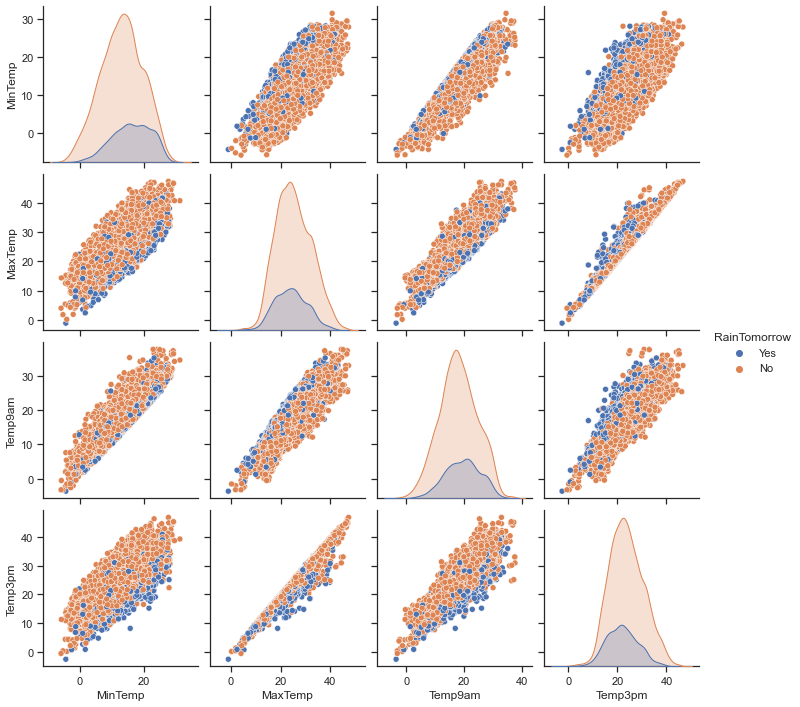

In [23]:
def pairplot(data,lst):
    sbn.set(style="ticks")
    sbn.pairplot(data[lst],hue="RainTomorrow")
lst=["MinTemp","MaxTemp","Temp9am","Temp3pm","RainTomorrow"]
data_2016=df[df.Year==2017]
pairplot(data_2016,lst)

## 9) Check if it will rain tomorow. Time series

In [24]:
from fbprophet import Prophet

m = Prophet()

df_for=df[['Date','Rainfall']]
df_for['Date']=pd.to_datetime(df_for['Date'])
df_for.rename(columns = {'Date':'ds'}, inplace = True)
df_for.rename(columns = {'Rainfall':'y'}, inplace = True)
m.fit(df_for)

/Users/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/akhil/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
# we are making data till 11th march 2021
future = m.make_future_dataframe(periods=1355)
future.tail()

ds
132264 2021-03-07
132265 2021-03-08
132266 2021-03-09
132267 2021-03-10
132268 2021-03-11

In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
132264 2021-03-07  3.510178  -12.314345   20.209694
132265 2021-03-08  3.517966  -11.795337   19.730578
132266 2021-03-09  3.459219  -12.848822   19.711446
132267 2021-03-10  3.514979  -12.628851   19.747004
132268 2021-03-11  3.486763  -13.499797   19.050659

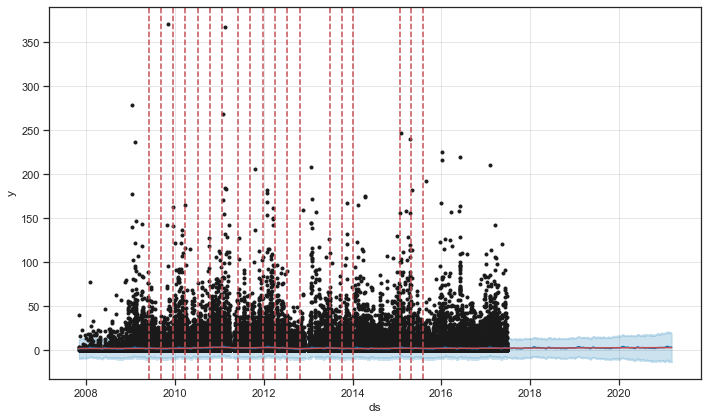

In [27]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

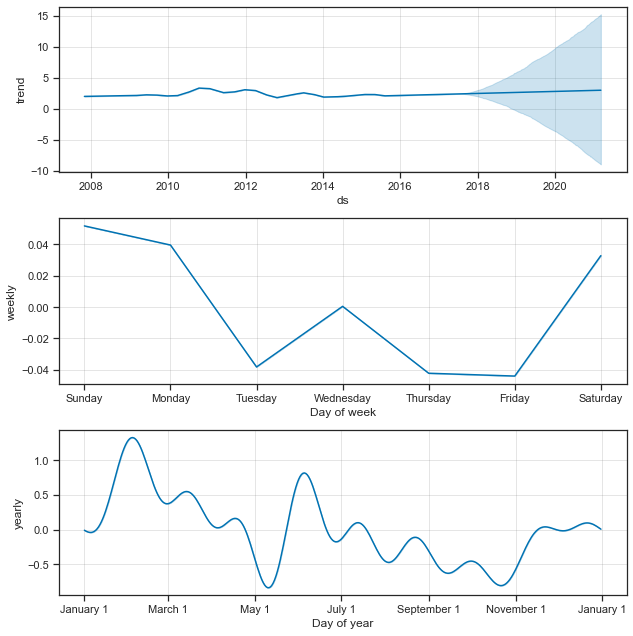

In [28]:
fig2 = m.plot_components(forecast)

These graphs show us the trend for yearly, weekly and day with respect to amount of rainfall. <br>
1) We can observe that in the year 2021 the amount of rainfall has remained prety similar to the previous years (2020,2019 e.t.c).<br>
2) Since 9th march is a tuesday we can tell that on tuesday's the amount of rainfall has reduced over the years. <br>
3) Finally we can observe that the rainfall has decreased in the month of march and april. 

## We can conclude using this time Series Graph that Tomorrow (9th March 2021) It will Not rain. 

# Data Pre-Processing

In [29]:
df["RainTomorrow"].isnull().sum()

2939

### 1) Drop rows with "Nan"  and  Drop "Date", "Year", "Month" and "Day" columns 

In [30]:
df = df.drop(["Year","Month","Day"],axis=1)
df.drop(["Date"],axis=1,inplace =True)
df = df.dropna(how ="all")
df = df.dropna(subset = ["RainToday","RainTomorrow"],how="any")
df = df.dropna(subset= ["WindDir9am","WindGustDir","WindDir3pm"],how="any")

### 2) Fill Nan Values

In [31]:
def fill_mean(column):
    for col in column:
        df[col] = df[col].fillna(df[col].mean())
columns_fill = df.columns.drop(["RainToday","RainTomorrow","WindDir9am","WindDir3pm","WindGustDir","Location"])
fill_mean(columns_fill)

### 3) Encoding Categorical Columns

In [32]:
def preprocessing(column):
    lbl = LabelEncoder()
    for col in column:
        lbl.fit(df[col])
        df[col] = lbl.transform(df[col].values.reshape(-1,))
columns_process = ["WindDir3pm","RainToday","WindDir9am","WindGustDir","Location"]
preprocessing(columns_process)

### 4) Decide train and Test Columns

In [33]:
feature_col = df.columns.drop("RainTomorrow")
train = df[feature_col]
target = df["RainTomorrow"].map({"Yes":1,"No":0}) #In here encode(0,1) target because i will use regression. 

In [34]:
train

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
1             25     16.1     22.1       2.4     4.200000   8.700000   
2             31     11.6     26.4       0.2     2.200000  10.400000   
3             11      6.8     16.5       0.8     1.400000   6.700000   
4              1     16.9     34.0       0.0     5.604813   7.714198   
6             13      8.0     20.4       0.2     5.604813   7.714198   
...          ...      ...      ...       ...          ...        ...   
130907        42     16.7     22.7       0.0    15.200000   0.500000   
130908        19     15.7     32.3       0.0     8.000000  11.300000   
130911        42      5.1     13.8       2.6     2.000000   7.500000   
130912        24      5.8     17.1       0.0     5.604813   7.714198   
130913         4      9.5     26.7       1.4     5.604813   7.714198   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
1                 8           31.0          11           8  ...          13.0   
2                13           37.0           6          13  ...          17.0   
3                 7           37.0           3          14  ...          20.0   
4                 3           30.0           0           2  ...           9.0   
6                10           30.0          14           2  ...          15.0   
...             ...            ...         ...         ...  ...           ...   
130907           11           46.0          13           1  ...           6.0   
130908           13           37.0           4           6  ...          13.0   
130911            1           13.0           4           1  ...           6.0   
130912           14           22.0           7           7  ...           2.0   
130913            5           35.0           5           3  ...          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
1              70.0         70.0       1020.2       1018.2   2.00000   
2              72.0         59.0       1018.4       1015.5   2.00000   
3              99.0         74.0       1015.0       1014.8   4.40763   
4              54.0         29.0       1019.5       1016.3   4.40763   
6              47.0         47.0       1017.2       1014.3   4.40763   
...             ...          ...          ...          ...       ...   
130907         67.0         99.0       1008.7       1007.3   7.00000   
130908         55.0         23.0       1023.1       1020.3   1.00000   
130911        100.0         60.0       1035.1       1034.2   2.00000   
130912         59.0         49.0       1028.6       1026.7   4.40763   
130913         64.0         46.0       1022.6       1019.8   6.00000   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
1       3.000000     19.9     20.3          1  
2       6.000000     19.7     24.0          0  
3       4.492314      8.6     14.8          0  
4       4.000000     24.7     31.8          0  
6       4.492314     16.3     19.5          0  
...          ...      ...      ...        ...  
130907  8.000000     21.7     19.3          0  
130908  2.000000     21.0     31.0          0  
130911  4.000000      6.7     13.4          1  
130912  4.492314     10.1     15.9          0  
130913  4.492314     16.8     26.1          1  

[111374 rows x 21 columns]

In [35]:
target

1         0
2         1
3         0
4         0
6         1
         ..
130907    1
130908    0
130911    0
130912    0
130913    0
Name: RainTomorrow, Length: 111374, dtype: int64

# Split into Train, Test and Validation Data

In [36]:
x_tr,x_test,y_tr,y_test = train_test_split(train,target,test_size=0.2,random_state=1)
x_train,x_val,y_train,y_val = train_test_split(x_tr,y_tr,test_size=0.1,random_state=1)

In [37]:
print("X train shape",x_train.shape)
print("Y train shape",y_train.shape)
print("X Val shape",x_val.shape)
print("Y Val shape",y_val.shape)

X train shape (80189, 21)
Y train shape (80189,)
X Val shape (8910, 21)
Y Val shape (8910,)


# Scale Data 

we will scale our training, testing and validation datasets. Standard Scaler will standardize features by removing the mean and scaling to unit variance. This is done by Subtracting the mean and dividing by Standard Deviation


In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
X_val = sc.transform(x_val)

# Build Model

In [39]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

In [40]:
# function to plot ROC Curve
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Model 1 : Logistic regression

Accuracy = 0.8471829405162739
ROC Area under Curve = 0.7255521828797165
Cohen's Kappa = 0.5059512969380345
Time taken = 0.9457969665527344
              precision    recall  f1-score   support

           0    0.86930   0.94538   0.90574     17300
           1    0.72696   0.50573   0.59649      4975

    accuracy                        0.84718     22275
   macro avg    0.79813   0.72555   0.75112     22275
weighted avg    0.83751   0.84718   0.83667     22275



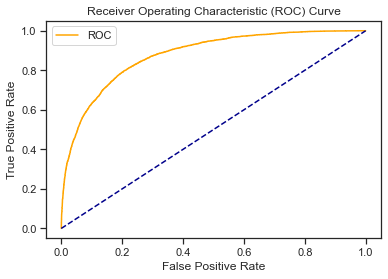

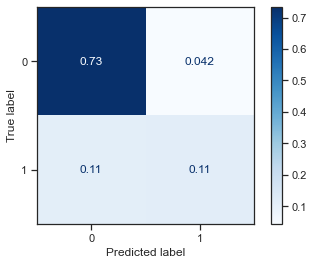

In [41]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

## Model 2 : Decision Tree

Accuracy = 0.8132435465768799
ROC Area under Curve = 0.6955399831527581
Cohen's Kappa = 0.42078682956359925
Time taken = 0.18962979316711426
              precision    recall  f1-score   support

           0    0.85929   0.90827   0.88310     17300
           1    0.60216   0.48281   0.53592      4975

    accuracy                        0.81324     22275
   macro avg    0.73072   0.69554   0.70951     22275
weighted avg    0.80186   0.81324   0.80556     22275



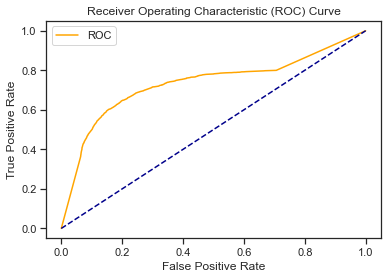

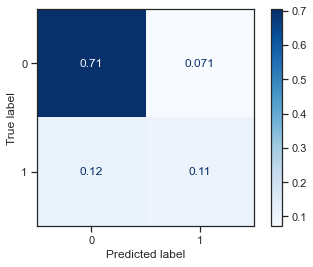

In [42]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Model 3 : Random Forest

Accuracy = 0.8568799102132435
ROC Area under Curve = 0.7336565776861185
Cohen's Kappa = 0.5311258592975474
Time taken = 11.29219126701355
              precision    recall  f1-score   support

           0    0.87180   0.95636   0.91212     17300
           1    0.77100   0.51095   0.61460      4975

    accuracy                        0.85688     22275
   macro avg    0.82140   0.73366   0.76336     22275
weighted avg    0.84929   0.85688   0.84567     22275



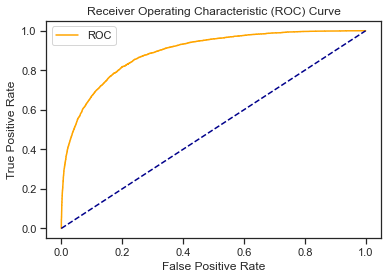

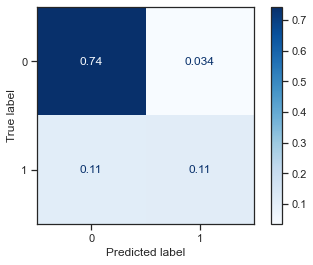

In [43]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

# Model 4 : XG Boost

/Users/akhil/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:04:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.863973063973064
ROC Area under Curve = 0.7655745490458071
Cohen's Kappa = 0.5753074137976599
Time taken = 45.54163098335266
              precision    recall  f1-score   support

           0    0.88836   0.94341   0.91506     17300
           1    0.74917   0.58774   0.65871      4975

    accuracy                        0.86397     22275
   macro avg    0.81877   0.76557   0.78688     22275
weighted avg    0.85727   0.86397   0.85780     22275



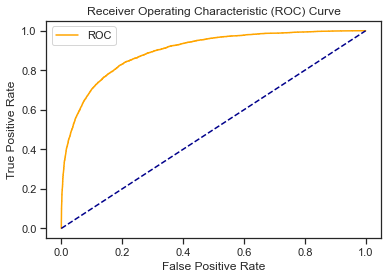

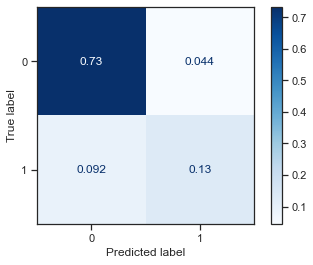

In [44]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# Model 5 :  LightGBM

Accuracy = 0.8668462401795736
ROC Area under Curve = 0.7659206436808319
Cohen's Kappa = 0.5808319769262223
Time taken = 1.202773094177246
              precision    recall  f1-score   support

           0    0.88787   0.94832   0.91710     17300
           1    0.76455   0.58352   0.66188      4975

    accuracy                        0.86685     22275
   macro avg    0.82621   0.76592   0.78949     22275
weighted avg    0.86032   0.86685   0.86010     22275



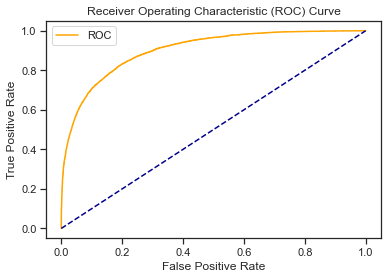

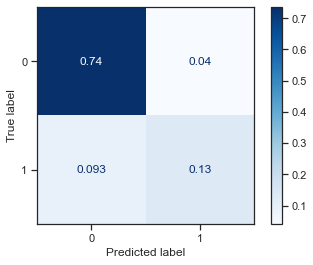

In [45]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

# Model Evaluation

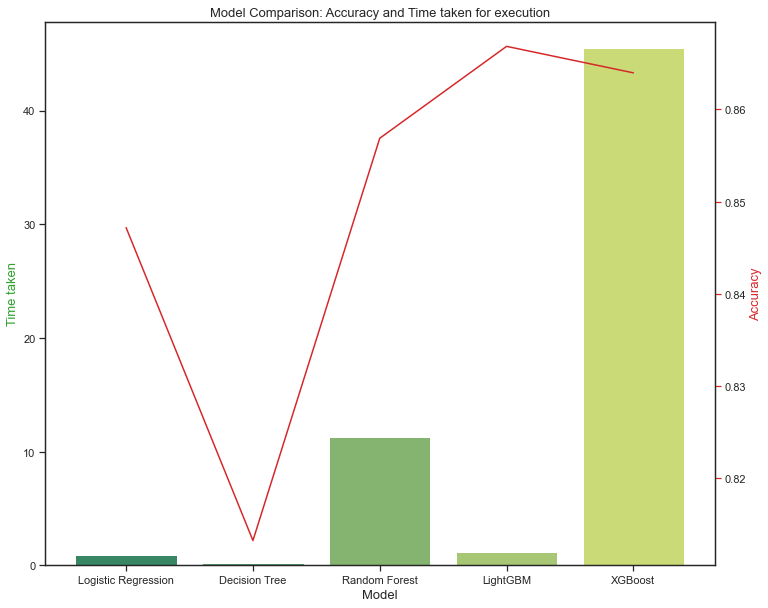

In [46]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_lgb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_lgb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sbn.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sbn.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

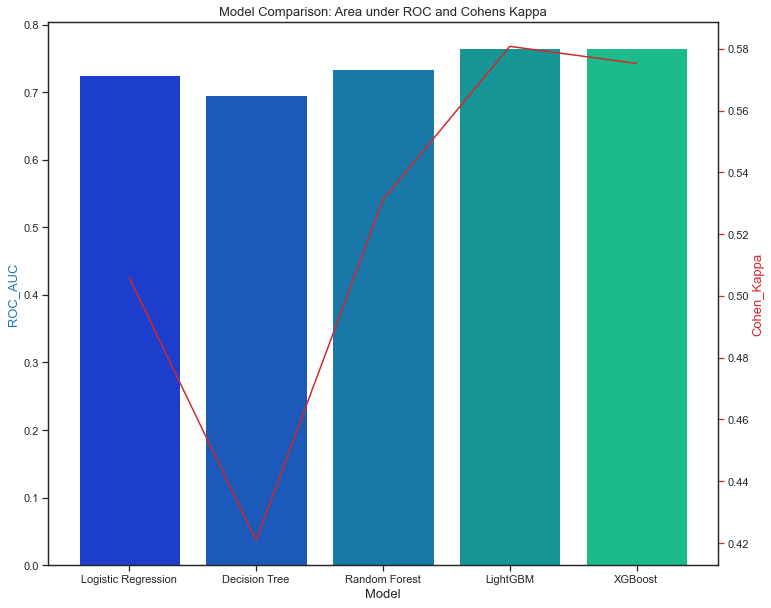

In [47]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sbn.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sbn.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

# Conclusion

Conclusion
We can observe that <b>XGBoost and Random Forest</b> have performed better compared to other models. However, if <b>speed is an important thing</b> to consider, we can <b>stick to Random Forest</b> instead of XGBoost. We can use these models to predict if It's going to rain tomorrow. 